In [1]:
data = [ 
    {
        "player": "Victor Osimhen",
        "minutes": 90,
        "won": 7,
        "lost": 4
    }, 
    {
        "player": "Leroy Sané",
        "minutes": 90,
        "won": 4,
        "lost": 7
    },
    {
        "player": "Mario Lemina",
        "minutes": 90,
        "won": 7,
        "lost": 3
    },
    {
        "player": "Davinson Sánchez",
        "minutes": 90,
        "won": 5,
        "lost": 5
    },
    {
        "player": "Barış Alper Yılmaz",
        "minutes": 80,
        "won": 3,
        "lost": 7
    },
    {
        "player": "Roland Sallai",
        "minutes": 90,
        "won": 7,
        "lost": 1
    },
    {
        "player": "Eren Elmalı",
        "minutes": 90,
        "won": 2,
        "lost": 4
    },
    {
        "player": "Yunus Akgün",
        "minutes": 65,
        "won": 1,
        "lost": 5
    }, 
    {
        "player": "Lucas Torreira",
        "minutes": 88,
        "won": 4,
        "lost": 1
    },
    {
        "player": "Abdülkerim Bardakcı",
        "minutes": 90,
        "won": 3,
        "lost": 2
    }                   
]

data.reverse()


background_color= "#151410"
ground="#65c2a5"
aerial="#8da0cb"
text_color = "white"
red = "#CC444B"

In [2]:
%pip install matplotlib pandas numpy 

from cProfile import label
import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.font_manager as font_manager


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


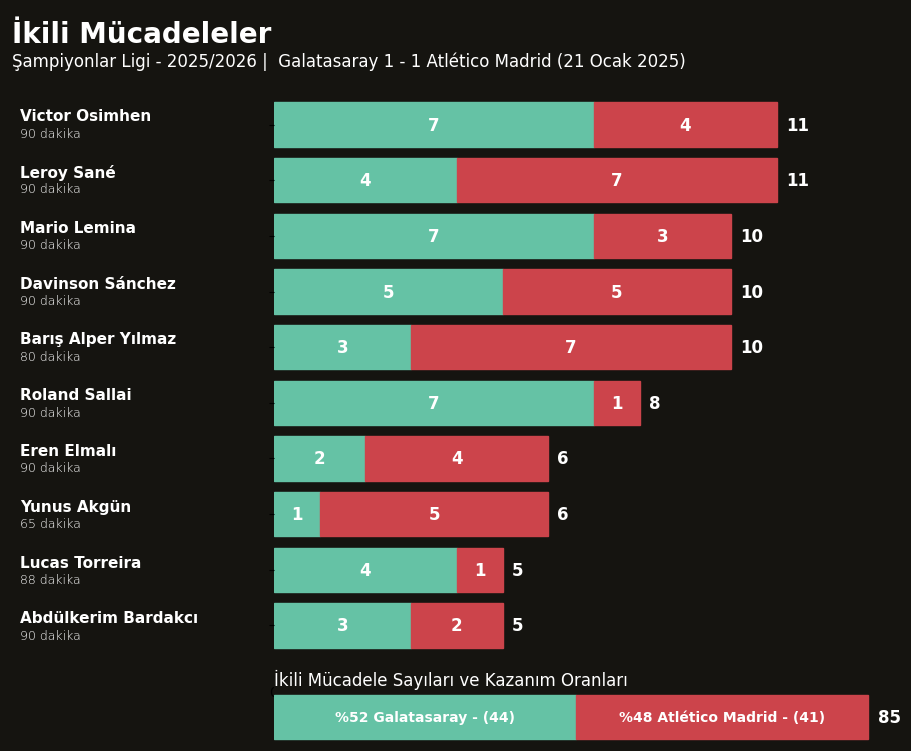

In [3]:
fig = plt.figure(figsize=(8,12))
fig.patch.set_facecolor(background_color)

title_section = fig.add_axes([0, 0.83, 0.13, 0.06])
title_section.set_facecolor(background_color)
# Title (Bold)
title_section.text(
    0.02,  # Left-aligned margin
    0.65,  # Centered vertically
    s="İkili Mücadeleler",
    ha="left",  # Align text to the left
    va="center",
    fontsize=20,
    fontweight="bold",
    color=text_color
)

# Subtitle (Smaller Font)
title_section.text(
    0.02,  # Same left margin for alignment
    0.28,  # Positioned below title
    s="Şampiyonlar Ligi - 2025/2026 |  Galatasaray 1 - 1 Atlético Madrid (21 Ocak 2025)",
    ha="left",
    va="center",
    fontsize=12,
    color=text_color
)
title_section.set_xlim(0,1)
title_section.set_ylim(0,1)
title_section.set_xticks([])
title_section.set_yticks([])
for spine in title_section.spines.values():
    spine.set_visible(False)

players_section = fig.add_axes([0, 0.335, 0.26, 0.5])
players_section.set_facecolor(background_color)
players_section.set_xlim(0,1)
players_section.set_ylim(0,1)
players_section.set_xlim(0,1)
players_section.set_ylim(0,1)
players_section.set_xticks([])
players_section.set_yticks([])
for spine in players_section.spines.values():
    spine.set_visible(False)

for idx, player in enumerate(data):
    y_pos = 0.095 + (idx * 0.093)  # Adjust vertical spacing
    players_section.text(0.05, y_pos, player["player"], fontsize=11, 
                         va="center", ha="left", color=text_color, 
                         weight="bold")
    players_section.text(0.05, y_pos - 0.028, f'{player["minutes"]} dakika', 
                         fontsize=9, va="center", ha="left", 
                         color=text_color, weight="ultralight")

chart_section = fig.add_axes([0.33, 0.335, 0.66, 0.5])
chart_section.set_facecolor(background_color)
chart_section.set_yticklabels([])
for spine in chart_section.spines.values():
    spine.set_visible(False)


for player in data:
    bar1 = chart_section.barh(
        player["player"], 
        player["won"], 
        color=ground,
        edgecolor=ground, 
        linewidth=1
    )    
    bar2 = chart_section.barh(
        player["player"], 
        player["lost"], 
        left=player["won"], 
        color=red, 
        edgecolor=red, 
        linewidth=1
    )
    
    
    if player["won"] > 0:
        chart_section.bar_label(
        bar1, 
        labels=[player["won"]], 
        label_type="center",
        color=text_color,
        weight="bold",
        fontsize=12
    )
    if player["lost"] > 0:
        chart_section.bar_label(
        bar2, 
        labels=[player["lost"]], 
        label_type="center",
        color=text_color,
        weight="bold",
        fontsize=12
    )
    total = player["won"] + player["lost"]
    chart_section.text(
        total + 0.2,  
        player["player"], 
        str(total) , 
        va='center', 
        color='white',
        fontsize=12,
        fontweight="bold"    
    )
    
legend_title = fig.add_axes([0.33, 0.315, 0.74, 0.03])
legend_title.set_facecolor(background_color)
legend_title.text(
    0,
    0.55,
    s="İkili Mücadele Sayıları ve Kazanım Oranları",
    ha="left",
    va="center",
    fontsize=12,
    color=text_color
)
legend_title.set_xticks([])
legend_title.set_yticks([])
for spine in legend_title.spines.values():
    spine.set_visible(False)
legend_section = fig.add_axes([0.33, 0.28, 0.78, 0.040])
legend_section.set_facecolor(background_color)
legend_section.set_xticks([])
legend_section.set_yticks([])
for spine in legend_section.spines.values():
    spine.set_visible(False)
bar1 = legend_section.barh(
        1, 
        3.05, 
        color=ground,
        edgecolor=ground, 
        linewidth=1)
bar2 = legend_section.barh(
        1, 
        2.95, 
        left=3.05, 
        color=red, 
        edgecolor=red, 
        linewidth=1)

legend_section.bar_label(
        bar1, 
        labels=["%52 Galatasaray - (44)"], 
        label_type="center",
        color=text_color,
        weight="bold"
    )
legend_section.bar_label(
        bar2, 
        labels=["%48 Atlético Madrid - (41)"], 
        label_type="center",
        color=text_color,
        weight="bold"
    )
legend_section.text(
        6.1,  
        1, 
        "85", 
        va='center', 
        color='white',
        fontsize=12,
        fontweight="bold"    
    )
fig.savefig("duels_chart.png", dpi=600, bbox_inches='tight')

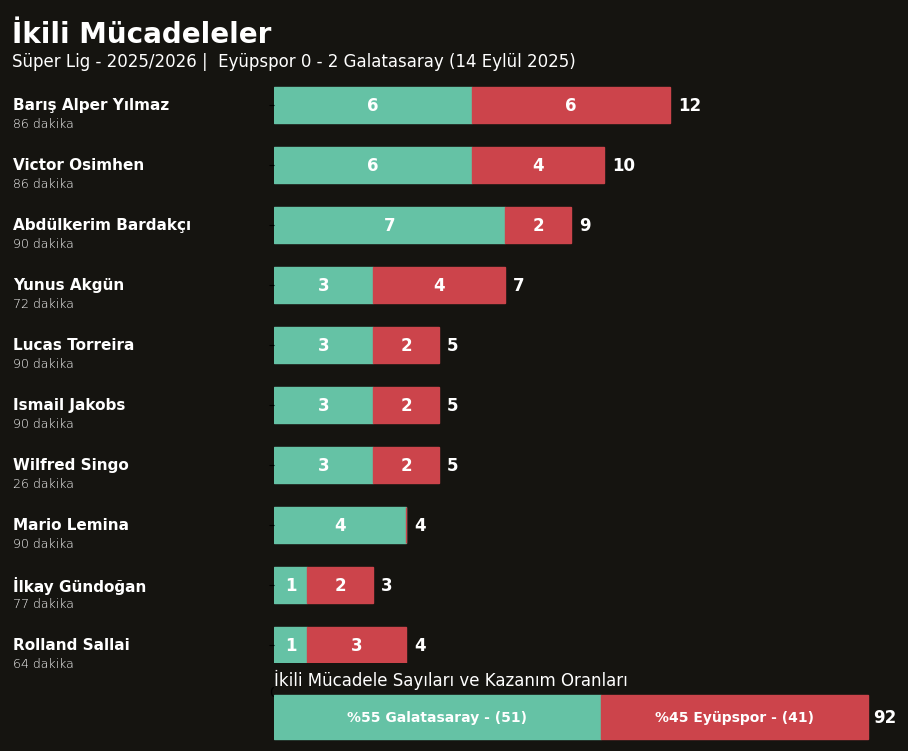

In [ ]:
import numpy as np

fig = plt.figure(figsize=(8,12))
fig.patch.set_facecolor(background_color)

# ---- TITLE SECTION ----
title_section = fig.add_axes([0, 0.83, 0.13, 0.06])
title_section.set_facecolor(background_color)
title_section.text(0.02, 0.65, s="İkili Mücadeleler",
                   ha="left", va="center", fontsize=20, fontweight="bold",
                   color=text_color)
title_section.text(0.02, 0.28,
                   s="Süper Lig - 2025/2026 |  Eyüpspor 0 - 2 Galatasaray (14 Eylül 2025)",
                   ha="left", va="center", fontsize=12, color=text_color)
title_section.set_xlim(0,1); title_section.set_ylim(0,1)
title_section.set_xticks([]); title_section.set_yticks([])
for spine in title_section.spines.values(): spine.set_visible(False)

# ---- prepare numeric positions & arrays ----
names = [p["player"] for p in data]
won_arr = np.array([p["won"] for p in data], dtype=float)
lost_arr = np.array([p["lost"] for p in data], dtype=float)
minutes_arr = [p["minutes"] for p in data]
totals = won_arr + lost_arr
y_pos = np.arange(len(data))           # numeric positions (0 .. N-1)
bar_height = 0.6                       # adjust if you want bars thinner/thicker

# ---- CHART SECTION (use numeric y positions) ----
chart_section = fig.add_axes([0.33, 0.335, 0.66, 0.5])
chart_section.set_facecolor(background_color)
chart_section.set_yticks(y_pos)
chart_section.set_yticklabels([])  # hide built-in labels (we draw names in the left column)
chart_section.set_ylim(-0.5, len(data)-0.5)

# set a sensible x limit so the totals/labels fit
xmax = max(4, int(np.max(totals) + 4))
chart_section.set_xlim(0, xmax)

# draw stacked horizontal bars using numeric y positions
bar1 = chart_section.barh(y_pos, won_arr, height=bar_height, color=ground, edgecolor=ground, linewidth=1)
bar2 = chart_section.barh(y_pos, lost_arr, left=won_arr, height=bar_height, color=red, edgecolor=red, linewidth=1)

# labels inside the bars (only if > 0)
chart_section.bar_label(bar1, labels=[str(int(v)) if v>0 else "" for v in won_arr],
                        label_type="center", color=text_color, weight="bold", fontsize=12)
chart_section.bar_label(bar2, labels=[str(int(v)) if v>0 else "" for v in lost_arr],
                        label_type="center", color=text_color, weight="bold", fontsize=12)

# total number to the right of each stacked bar
for i, tot in enumerate(totals):
    chart_section.text(tot + 0.25, y_pos[i], str(int(tot)),
                       va='center', color='white', fontsize=12, fontweight="bold")

for spine in chart_section.spines.values(): spine.set_visible(False)

# ---- PLAYERS SECTION (exact same y positions -> perfectly aligned) ----
players_section = fig.add_axes([0, 0.335, 0.20, 0.5])   # you already set width=0.20
players_section.set_facecolor(background_color)
players_section.set_xlim(0,1)
players_section.set_ylim(-0.5, len(data)-0.5)          # same vertical range as chart_section
players_section.set_xticks([]); players_section.set_yticks([])
for spine in players_section.spines.values(): spine.set_visible(False)

# draw name and minutes using the same y positions
for i, p in enumerate(data):
    players_section.text(0.02, y_pos[i], p["player"],
                         fontsize=11, va="center", ha="left",
                         color=text_color, weight="bold")
    players_section.text(0.02, y_pos[i] - 0.30, f'{p["minutes"]} dakika',
                         fontsize=9, va="center", ha="left",
                         color=text_color, weight="ultralight")

# If you prefer the first player to appear at the top, uncomment the two lines below:
# chart_section.invert_yaxis()
# players_section.invert_yaxis()

# ---- LEGEND TITLE ----
legend_title = fig.add_axes([0.33, 0.315, 0.74, 0.03])
legend_title.set_facecolor(background_color)
legend_title.text(0, 0.55, s="İkili Mücadele Sayıları ve Kazanım Oranları",
                  ha="left", va="center", fontsize=12, color=text_color)
legend_title.set_xticks([]); legend_title.set_yticks([])
for spine in legend_title.spines.values(): spine.set_visible(False)

# ---- LEGEND SECTION ----
legend_section = fig.add_axes([0.33, 0.28, 0.78, 0.040])
legend_section.set_facecolor(background_color)
legend_section.set_xticks([]); legend_section.set_yticks([])
for spine in legend_section.spines.values(): spine.set_visible(False)

lbar1 = legend_section.barh(1, 3.3, color=ground, edgecolor=ground, linewidth=1)
lbar2 = legend_section.barh(1, 2.7, left=3.3, color=red, edgecolor=red, linewidth=1)
legend_section.bar_label(lbar1, labels=["%55 Galatasaray - (51)"], label_type="center", color=text_color, weight="bold")
legend_section.bar_label(lbar2, labels=["%45 Eyüpspor - (41)"], label_type="center", color=text_color, weight="bold")
legend_section.text(6.05, 1, "92", va='center', color='white', fontsize=12, fontweight="bold")

fig.savefig("duels_chart.png", dpi=600, bbox_inches='tight')
plt.show()
